# **Working with Dates and Time Series Data**

En el mundo del análisis de datos, el tiempo desempeña un papel crucial. Las fechas y las secuencias temporales son elementos esenciales para comprender patrones, tendencias y relaciones en una amplia variedad de conjuntos de datos. Para gestionar y analizar eficazmente los datos relacionados con el tiempo, se utilizan conceptos como "datetimes" (fechas y horas) y "time series" (series temporales). Estas herramientas permiten a los analistas extraer información valiosa y tomar decisiones informadas en diversos campos, desde finanzas hasta ciencias sociales y más allá.



## **Datetimes:**

Los "datetimes" son combinaciones de fechas y horas que se utilizan para representar momentos específicos en el tiempo. Estas combinaciones son más que simples números; incorporan contextos temporales que son cruciales para el análisis. Las necesidades de utilizar "datetimes" en el análisis de datos incluyen:

1. Secuenciación temporal: Almacenar y organizar datos en función de sus marcas de tiempo permite capturar la secuencia en la que ocurrieron los eventos. Esto es esencial para comprender el orden y la relación temporal entre diferentes observaciones.

2. Análisis temporal: Las tendencias, patrones y estacionalidades en los datos a menudo son más claros cuando se analizan en función del tiempo. Las "datetimes" permiten visualizar y analizar cómo evolucionan los datos a lo largo del tiempo.

3. Segmentación y agrupación: Las "datetimes" permiten agrupar datos en intervalos específicos, como días, semanas o meses. Esto facilita la agregación y el análisis de tendencias en diferentes escalas temporales.



##**Time Series:**

Una "time series" es una secuencia ordenada de datos observados en diferentes momentos a lo largo del tiempo. Estos datos pueden representar una variedad de fenómenos, como ventas diarias, precios de acciones, temperaturas, tasas de inflación y más. Las necesidades de utilizar "time series" en el análisis de datos incluyen:

1. Predicción y pronóstico: Las "time series" históricas pueden usarse para predecir valores futuros. Modelos estadísticos y de aprendizaje automático pueden aprovechar patrones pasados para pronosticar tendencias y comportamientos futuros.

2. Detección de anomalías: Identificar puntos atípicos en una serie temporal puede ser crucial para la detección temprana de problemas o oportunidades. Las anomalías pueden indicar cambios significativos en el comportamiento normal de los datos.

3. Análisis de tendencias y estacionalidad: Las "time series" a menudo exhiben patrones estacionales y tendencias a lo largo del tiempo. Estos patrones pueden proporcionar información valiosa sobre ciclos económicos, cambios estacionales y otros fenómenos recurrentes.

4. Optimización temporal: Al analizar series temporales, es posible identificar los momentos más óptimos para tomar decisiones, como cuándo invertir, comprar o vender.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/tomasate/Datos_Clases/main/Datos_1/ETH_1h.csv')
df.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


In [3]:
df.shape

(23674, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23674 entries, 0 to 23673
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    23674 non-null  object 
 1   Symbol  23674 non-null  object 
 2   Open    23674 non-null  float64
 3   High    23674 non-null  float64
 4   Low     23674 non-null  float64
 5   Close   23674 non-null  float64
 6   Volume  23674 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.3+ MB


In [5]:
type(df.loc[0, 'Date'])

str

Si intentamos usar un método de los datetimes veremos que son apenas str

In [6]:
df.loc[0, 'Date'].day_name()

AttributeError: 'str' object has no attribute 'day_name'

El método `.to_datetime` puede ser aplicado para redefinir una columna de valores de tipo objeto.
Sin embargo en este caso obtendremos un error de formato
```
df['Date'] = pd.to_datetime(df['Date'])
```

Para solucionarlo, podemos dirigirnos a la documentación y ver cómo debemos formatear [Python doc](https://docs.python.org/3.6/library/datetime.html#strftime-and-strptime-behavior).

In [7]:
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d %I-%p')
df

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
...,...,...,...,...,...,...,...
23669,2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55
23670,2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85
23671,2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99
23672,2017-07-01 12:00:00,ETHUSD,275.01,275.01,271.00,274.83,824362.87


In [8]:
df.loc[0, 'Date'].day_name()

'Friday'


Puede convertir una columna a una serie de tiempo al cargar la data

In [9]:
import datetime as dt
d_parser = lambda x: dt.datetime.strptime(x, '%Y-%m-%d %I-%p')
df = pd.read_csv('https://raw.githubusercontent.com/tomasate/Datos_Clases/main/Datos_1/ETH_1h.csv', parse_dates=['Date'], date_parser=d_parser)

In [10]:
df.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


In [11]:
df['Date']

0       2020-03-13 20:00:00
1       2020-03-13 19:00:00
2       2020-03-13 18:00:00
3       2020-03-13 17:00:00
4       2020-03-13 16:00:00
                ...        
23669   2017-07-01 15:00:00
23670   2017-07-01 14:00:00
23671   2017-07-01 13:00:00
23672   2017-07-01 12:00:00
23673   2017-07-01 11:00:00
Name: Date, Length: 23674, dtype: datetime64[ns]

In [12]:
df['Date'].dt.day_name()

0          Friday
1          Friday
2          Friday
3          Friday
4          Friday
           ...   
23669    Saturday
23670    Saturday
23671    Saturday
23672    Saturday
23673    Saturday
Name: Date, Length: 23674, dtype: object

In [13]:
df['Day_of_week'] = df['Date'].dt.day_name()

In [14]:
df.head()

,Date,Symbol,Open,High,Low,Close,Volume,Day_of_week
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday


In [15]:
df['Date'].min()

Timestamp('2017-07-01 11:00:00')

In [16]:
df['Date'].max()

Timestamp('2020-03-13 20:00:00')

In [17]:
df['Date'].max() - df['Date'].min()

Timedelta('986 days 09:00:00')

In [18]:
df.loc[df['Date'] >= '2019']

,Date,Symbol,Open,High,Low,Close,Volume,Day_of_week
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...,...
10504,2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
10505,2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
10506,2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday
10507,2019-01-01 01:00:00,ETHUSD,131.62,131.62,130.77,130.79,434917.99,Tuesday


In [19]:
df.loc[(df['Date'] >= '2019') & (df['Date'] < '2020')]

,Date,Symbol,Open,High,Low,Close,Volume,Day_of_week
1749,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
1750,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
1751,2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
1752,2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
1753,2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...,...
10504,2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
10505,2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
10506,2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday
10507,2019-01-01 01:00:00,ETHUSD,131.62,131.62,130.77,130.79,434917.99,Tuesday


Hagamos la serie de tiempos el índice


In [20]:
df.set_index('Date', inplace=True)

Este cambio se hace permanente en:


In [21]:
df

,Symbol,Open,High,Low,Close,Volume,Day_of_week
Date,,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...
2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday
2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday
2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday


Ahora, extraemos la data requerida con un indexador:

In [22]:
df.loc['2019']

,Symbol,Open,High,Low,Close,Volume,Day_of_week
Date,,,,,,,
2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...
2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday


Extraemos la data de una forma más compleja:

In [23]:
df.loc['2020-01':'2020-02']

,Symbol,Open,High,Low,Close,Volume,Day_of_week
Date,,,,,,,
2020-02-29 23:00:00,ETHUSD,223.35,223.58,216.83,217.31,1927939.88,Saturday
2020-02-29 22:00:00,ETHUSD,223.48,223.59,222.14,223.35,535998.57,Saturday
2020-02-29 21:00:00,ETHUSD,224.63,225.14,222.74,223.48,561158.03,Saturday
2020-02-29 20:00:00,ETHUSD,225.31,225.33,223.50,224.63,511648.65,Saturday
2020-02-29 19:00:00,ETHUSD,225.09,225.85,223.87,225.31,1250856.20,Saturday
...,...,...,...,...,...,...,...
2020-01-01 04:00:00,ETHUSD,129.57,130.00,129.50,129.56,702786.82,Wednesday
2020-01-01 03:00:00,ETHUSD,130.37,130.44,129.38,129.57,496704.23,Wednesday
2020-01-01 02:00:00,ETHUSD,130.14,130.50,129.91,130.37,396315.72,Wednesday


Extraemos solo una columna

In [24]:
df.loc['2020-01':'2020-02','Close']

Date
2020-02-29 23:00:00    217.31
2020-02-29 22:00:00    223.35
2020-02-29 21:00:00    223.48
2020-02-29 20:00:00    224.63
2020-02-29 19:00:00    225.31
                        ...  
2020-01-01 04:00:00    129.56
2020-01-01 03:00:00    129.57
2020-01-01 02:00:00    130.37
2020-01-01 01:00:00    130.14
2020-01-01 00:00:00    128.34
Name: Close, Length: 1440, dtype: float64

El promedio de esa columna

In [25]:
df.loc['2020-01':'2020-02','Close'].mean()

195.1655902777778

Los valores de High para un día

In [27]:
df.loc['2020-01-01','High']

Date
2020-01-01 23:00:00    130.27
2020-01-01 22:00:00    131.41
2020-01-01 21:00:00    131.99
2020-01-01 20:00:00    131.87
2020-01-01 19:00:00    131.72
2020-01-01 18:00:00    132.14
2020-01-01 17:00:00    132.68
2020-01-01 16:00:00    132.56
2020-01-01 15:00:00    132.15
2020-01-01 14:00:00    132.05
2020-01-01 13:00:00    132.08
2020-01-01 12:00:00    131.31
2020-01-01 11:00:00    131.42
2020-01-01 10:00:00    130.33
2020-01-01 09:00:00    130.22
2020-01-01 08:00:00    130.01
2020-01-01 07:00:00    130.25
2020-01-01 06:00:00    130.25
2020-01-01 05:00:00    129.94
2020-01-01 04:00:00    130.00
2020-01-01 03:00:00    130.44
2020-01-01 02:00:00    130.50
2020-01-01 01:00:00    130.14
2020-01-01 00:00:00    128.54
Name: High, dtype: float64

El más alto valor de High de un día

In [28]:
df.loc['2020-01-01','High'].max()

132.68

Hemos extraido el valor máximo del $1°$ de Enero de 2020, sin embargo, podemos hacer un muestreo para observar el valor máximo por día (o semana o mes).

Podemos hacer un remuestreo de la data.

API de Python para objetos [date_offset](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects).

Hagámoslo por semana

In [32]:
df['High'].resample('W').max()


Date
2017-07-02    293.73
2017-07-09    285.00
2017-07-16    240.33
2017-07-23    249.40
2017-07-30    229.99
               ...  
2020-02-16    290.00
2020-02-23    287.13
2020-03-01    278.13
2020-03-08    253.01
2020-03-15    208.65
Freq: W-SUN, Name: High, Length: 142, dtype: float64

Haciendo lo mismo a traves de los días podemos reemplazar la `W` por `D`, y comparando con el resultado previamente obtenido:

In [ ]:
highs = df['High'].resample('D').max()


Veamos cuánto es el mayor valor del primero de enero

In [33]:
highs.loc['2020-01-01']

132.68

Para mostrar los gráficos podemos usar el comando mágico de  `%matplotlib` (debe tener matplotlib previamente instalado):

In [34]:
%matplotlib inline

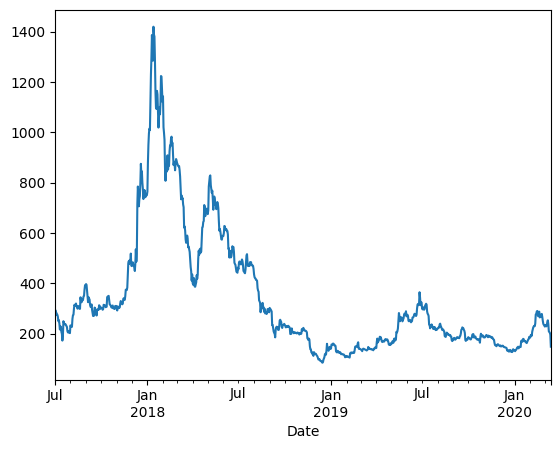

In [36]:
highs.plot();